In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

In [2]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

IDcoverC=2
fpc_cover=-40
epsc0_cover=-0.002
fpcu_cover=-8
epsU_cover=-0.004
ops.uniaxialMaterial('Concrete01', IDcoverC, fpc_cover, epsc0_cover, fpcu_cover, epsU_cover)

IDcoreC=3
fpc_core=-40
epsc0_core=-0.0024
fpcu_core=-18
epsU_core=-0.006
ops.uniaxialMaterial('Concrete01', IDcoreC, fpc_core, epsc0_core, fpcu_core, epsU_core)


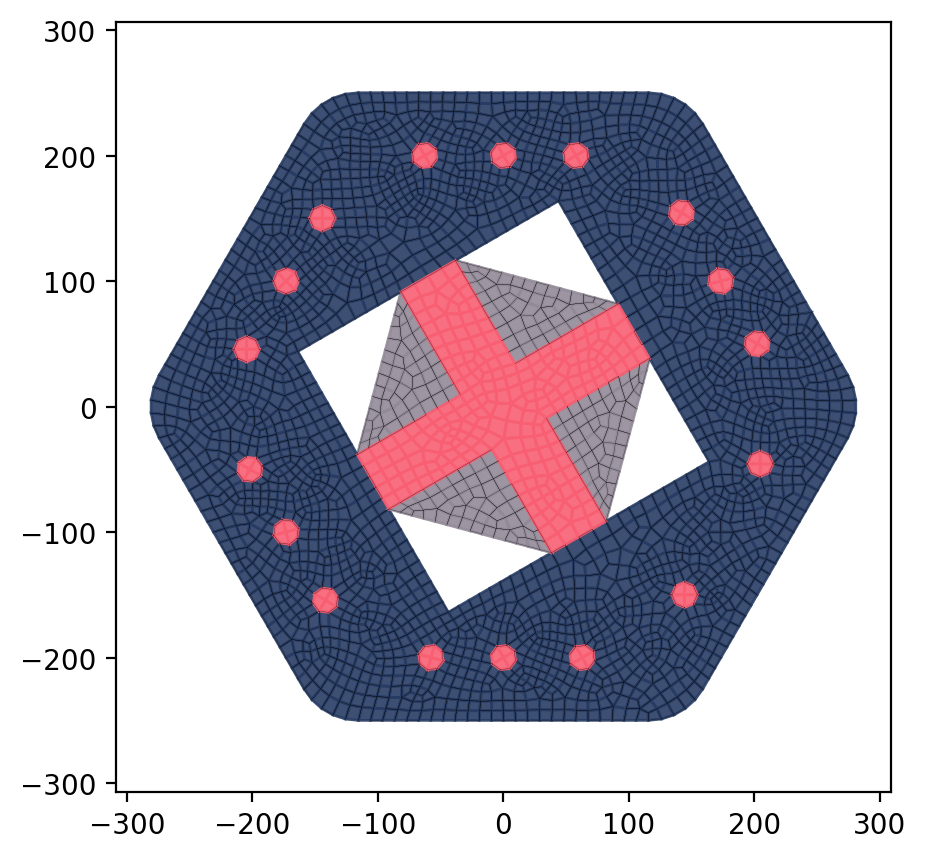

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(num=1, figsize=(5, 5),dpi=200)

Element_Abaqus_Load=np.loadtxt('Element.txt',skiprows=1,delimiter=',')
Node_Abaqus_Load=np.loadtxt('Node.txt',skiprows=1,delimiter=',')
Steel_Abaqus_Load=np.loadtxt('Steel.txt',skiprows=1,delimiter=',')
CoreC_Abaqus_Load=np.loadtxt('CoreC.txt',skiprows=1,delimiter=',')
OpenSees_Import=np.empty([0,4])
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

for Element in Element_Abaqus_Load:
    Temp_Import=np.zeros([1,4])
    ElementTag=int(Element[0])
    Element1=int(Element[1])
    Element2=int(Element[2])
    Element3=int(Element[3])
    Element4=int(Element[4])
    Element1_Coordinate=Node_Abaqus_Load[Element1-1,[1,2]]
    Element2_Coordinate=Node_Abaqus_Load[Element2-1,[1,2]]
    Element3_Coordinate=Node_Abaqus_Load[Element3-1,[1,2]]
    Element4_Coordinate=Node_Abaqus_Load[Element4-1,[1,2]]
    Element_Coordinate=(Element1_Coordinate+Element2_Coordinate+Element3_Coordinate+Element4_Coordinate)/4
    x = [Element1_Coordinate[0],Element2_Coordinate[0],Element3_Coordinate[0],Element4_Coordinate[0]]
    y = [Element1_Coordinate[1],Element2_Coordinate[1],Element3_Coordinate[1],Element4_Coordinate[1]]
    Element_Area= PolyArea(x,y)
    

    Temp_Import[0,0]=Element_Coordinate[0]
    Temp_Import[0,1]=Element_Coordinate[1]
    Temp_Import[0,2]=Element_Area

    if ElementTag in Steel_Abaqus_Load:
        plt.fill(x,y,color="#f85f73", alpha=0.9)
        Temp_Import[0,3]=IDSteel
    elif ElementTag in CoreC_Abaqus_Load:
        plt.fill(x,y,color="#928a97", alpha=0.9)
        plt.plot(x,y,color="k", alpha=0.9,linewidth=0.1)
        Temp_Import[0,3]=IDcoreC
    else:
        plt.fill(x,y,color="#283c63", alpha=0.9)
        plt.plot(x,y,color="k", alpha=0.9,linewidth=0.1)
        Temp_Import[0,3]=IDcoverC
    OpenSees_Import=np.append(OpenSees_Import,Temp_Import,axis=0)
plt.axis('equal')
plt.show()
np.savetxt('OpenSees_Import.txt',OpenSees_Import)


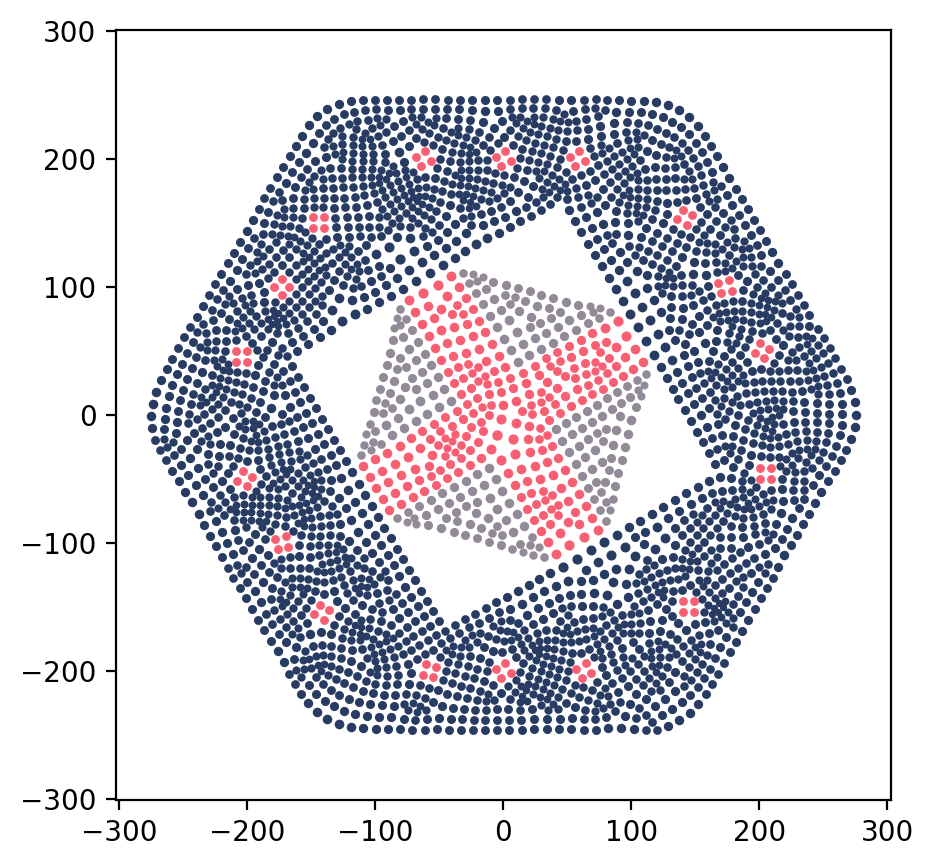

In [13]:
OpenSees_Import=np.loadtxt('OpenSees_Import.txt')
fig = plt.figure(num=1, figsize=(5, 5),dpi=200)
for fiber in OpenSees_Import:
    y=fiber[0]
    z=fiber[1]
    A=fiber[2]
    mat=fiber[3]
    r=np.sqrt(A/np.pi)
    if mat==IDcoreC:
        plt.scatter(y,z,s=r,color='#928a97')
    if mat==IDcoverC:
        plt.scatter(y,z,s=r,color='#283c63')
    if mat==IDSteel:
        plt.scatter(y,z,s=r,color='#f85f73')
plt.axis('equal')
plt.show()